In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import datetime as dt
import seaborn as sb

In [2]:
df = pd.read_csv("../Nguyen/data/raw/dataset1/rawDataset1.csv")

In [3]:
df.head()

,car_name,year,selling_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,335000,27000,Petrol,Dealer,Manual,First Owner
1,sx4,2013,475000,43000,Diesel,Dealer,Manual,First Owner
2,ciaz,2017,725000,6900,Petrol,Dealer,Manual,First Owner
3,wagon r,2011,285000,5200,Petrol,Dealer,Manual,First Owner
4,swift,2014,460000,42450,Diesel,Dealer,Manual,First Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11875 entries, 0 to 11874
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       11875 non-null  object
 1   year           11875 non-null  int64 
 2   selling_price  11875 non-null  int64 
 3   kms_driven     11875 non-null  int64 
 4   fuel_type      11875 non-null  object
 5   seller_type    11875 non-null  object
 6   transmission   11875 non-null  object
 7   owner          11875 non-null  object
dtypes: int64(3), object(5)
memory usage: 742.3+ KB


Insights:
Here, 'car_name' does not contribute anything for further analysing. Therefore, it will be dropped out of input dataset. Beside that, to make analysing process a bit more easy, years of manufacture 'year' will be replaced with cars' age.

In [5]:
df.drop(columns=["car_name"], inplace=True)
df['cars_years_old'] = dt.date.today().year - df.year
df.drop(columns="year", inplace=True)

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
selling_price,11875.0,NaN,NaN,NaN,586452.873432,724512.163983,10000.0,239000.0,416000.0,650000.0,10000000.0
kms_driven,11875.0,NaN,NaN,NaN,67791.486232,53516.350356,1.0,34000.0,60000.0,90000.0,2360457.0
fuel_type,11875,5,Diesel,6158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,11875,3,Individual,9413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,11875,2,Manual,10439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,11875,5,First Owner,7812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cars_years_old,11875.0,NaN,NaN,NaN,8.441768,4.101566,2.0,5.0,8.0,11.0,39.0


Insights:
Dependent variable (or target) according to the purpose of this project is 'selling_price'.
All other variables are independent. They can be divided into 2 categories: numerical and categorical
Numerical variables: kms_driven, cars_years_old
Categorical variables: fuel_type, seller_type, transmission, owner

In [7]:
df.isnull().sum()

selling_price     0
kms_driven        0
fuel_type         0
seller_type       0
transmission      0
owner             0
cars_years_old    0
dtype: int64

In [8]:
df.fuel_type = pd.Categorical(df.fuel_type)
df = df.assign(fuel_type_code=df.fuel_type.cat.codes)
df.seller_type = pd.Categorical(df.seller_type)
df = df.assign(seller_type_code=df.seller_type.cat.codes)
df.transmission = pd.Categorical(df.transmission)
df = df.assign(transmission_code=df.transmission.cat.codes)
df.owner = pd.Categorical(df.owner)
df = df.assign(owner_code=df.owner.cat.codes)
df

,selling_price,kms_driven,fuel_type,seller_type,transmission,owner,cars_years_old,fuel_type_code,seller_type_code,transmission_code,owner_code
0,335000,27000,Petrol,Dealer,Manual,First Owner,8,4,0,1,0
1,475000,43000,Diesel,Dealer,Manual,First Owner,9,1,0,1,0
2,725000,6900,Petrol,Dealer,Manual,First Owner,5,4,0,1,0
3,285000,5200,Petrol,Dealer,Manual,First Owner,11,4,0,1,0
4,460000,42450,Diesel,Dealer,Manual,First Owner,8,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11870,475000,80000,Diesel,Individual,Manual,Second Owner,8,1,1,1,2
11871,320000,110000,Petrol,Individual,Manual,First Owner,9,4,1,1,0
11872,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,15,1,1,1,1
11873,382000,120000,Diesel,Individual,Manual,First Owner,13,1,1,1,0


For all categorical variables, need to create a dummies (substitute) for further analysing

C:\Users\htien\AppData\Local\Temp\ipykernel_16104\942198276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


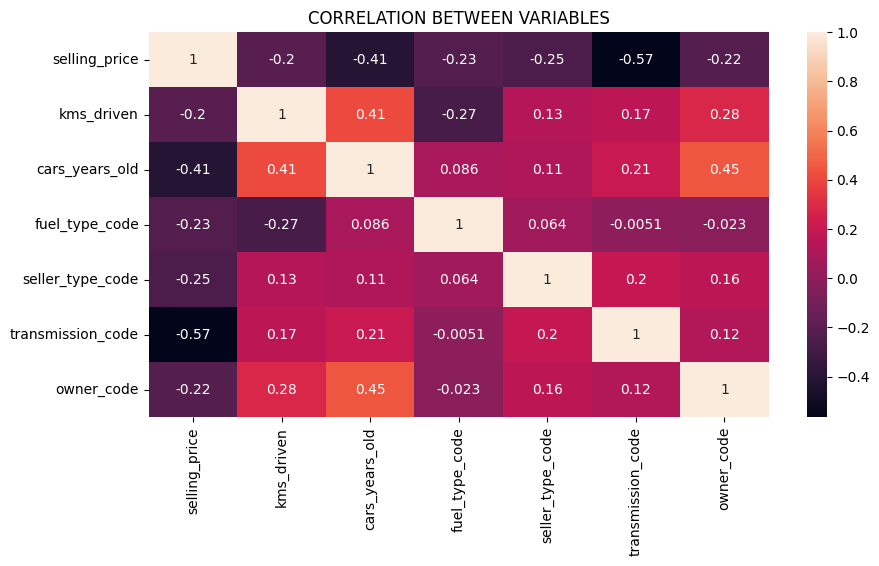

In [9]:
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

Insights:
In this heatmap we can see that there is high correlation between cars' selling price and cars' age (cars_years_old) and transmission. Correlation between selling price and others is also notable.
There's also correlation between some independent variables that we need to have a glance on. (kms_driven - cars_years_old; kms_driven - fuel_type; kms_driven - owner; cars_years_old - transmission; cars_years_old - owner; seller_type - transmission)

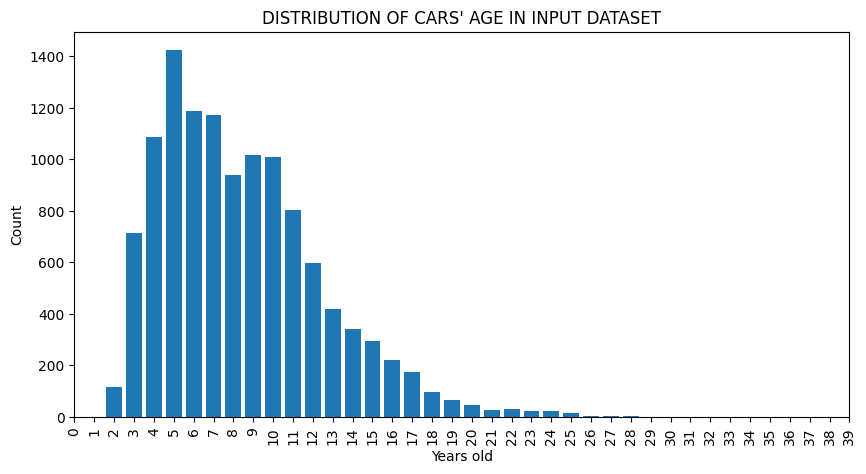

In [10]:
values = []
levels = df['cars_years_old'].unique()
for level in levels:
    values.append(df['cars_years_old'].loc[df['cars_years_old'] == level].count())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(levels, values)
plt.xticks(rotation=90)
plt.xlabel("Years old")
plt.ylabel("Count")
plt.xlim(0, max(levels))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("DISTRIBUTION OF CARS' AGE IN INPUT DATASET")
plt.show()

Insights:
Collected data shows that most of selling cars is no older than 20 years. Cars with age between 4 and 10 are the most.

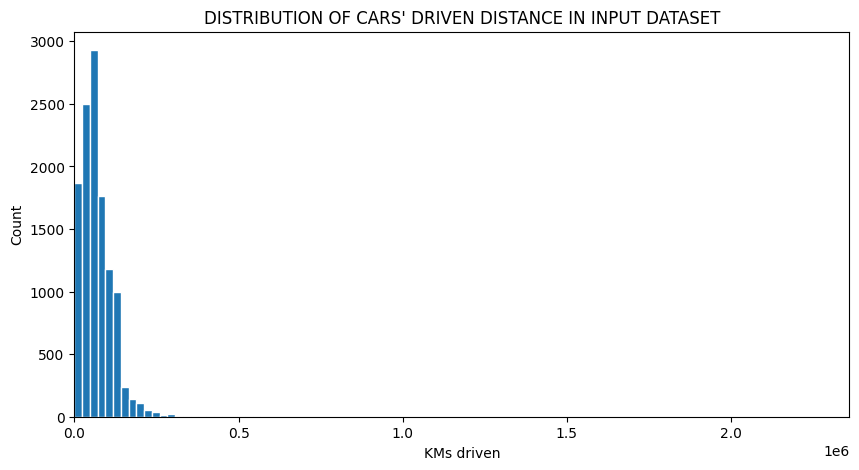

In [11]:
plt.figure(figsize=(10, 5))
bin_number = 100
plt.hist(df.kms_driven, bins=bin_number, edgecolor="white")
plt.xlabel("KMs driven")
plt.xlim(0, max(df.kms_driven))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF CARS' DRIVEN DISTANCE IN INPUT DATASET")
plt.show()

Insights: This graph shows that most cars have travel under 250000 kms

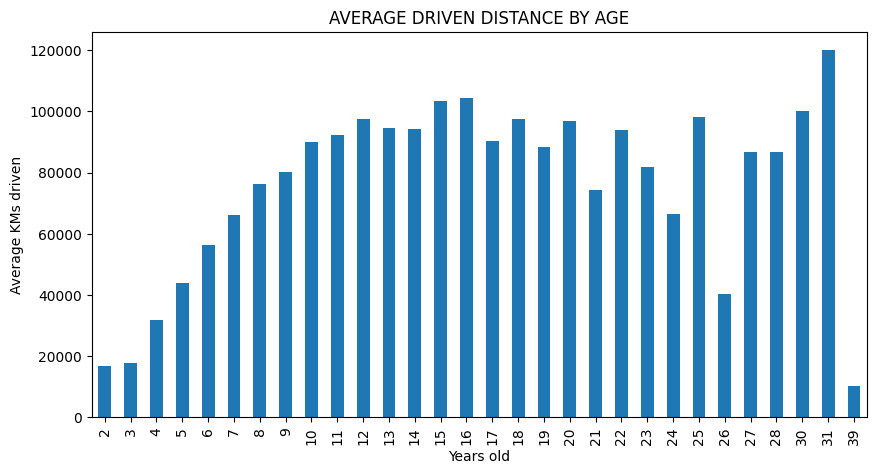

In [12]:
plt.figure(figsize=(10, 5))
mean_kmsdriven_yearsold = df.groupby('cars_years_old')['kms_driven'].mean().round(2)
mean_kmsdriven_yearsold.plot(kind="bar")
plt.xlabel("Years old")
plt.ylabel("Average KMs driven")
plt.title("AVERAGE DRIVEN DISTANCE BY AGE")
plt.show()

Insights: We can see here that car's travel distance tends to increase its age. But it only increases to somewhat level and then not changes much. This can be understood that people tend to stop using their cars when they've traveled for about 100000 kms or the cars became too old. Then people start selling them.

In [13]:
fuel_type = df.fuel_type.value_counts()
fuel_type

Diesel      6158
Petrol      5570
CNG           90
LPG           56
Electric       1
Name: fuel_type, dtype: int64

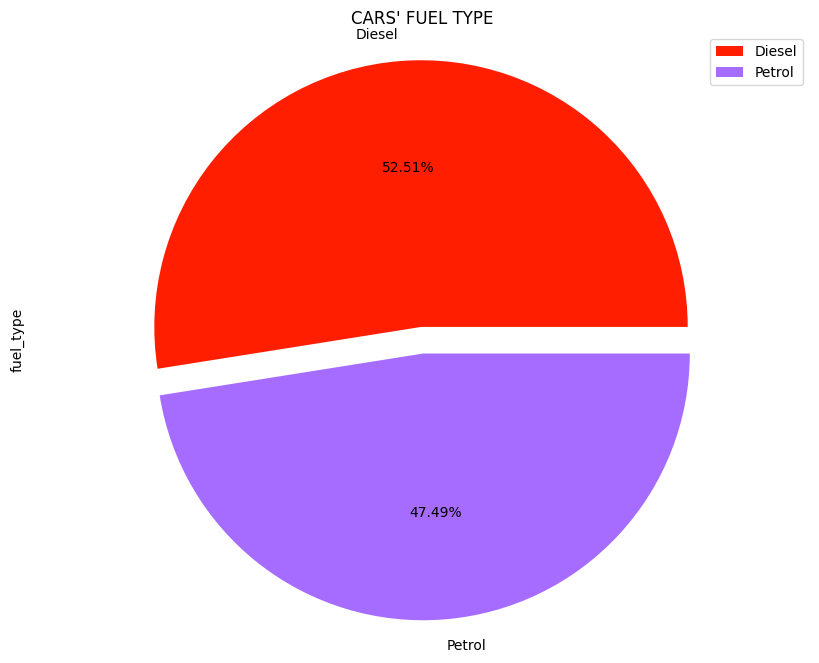

In [14]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

fuel_type[:2].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=fuel_type[:2].index, loc="best")
plt.title("CARS' FUEL TYPE")
plt.show()

Insights: Used fuel types of selling cars mostly are diesel and petrol. Number of cars using other fuel is unnoticeable. The numbers of diesel cars and petrol cars are about the same. (Diesel cars is slightly more)

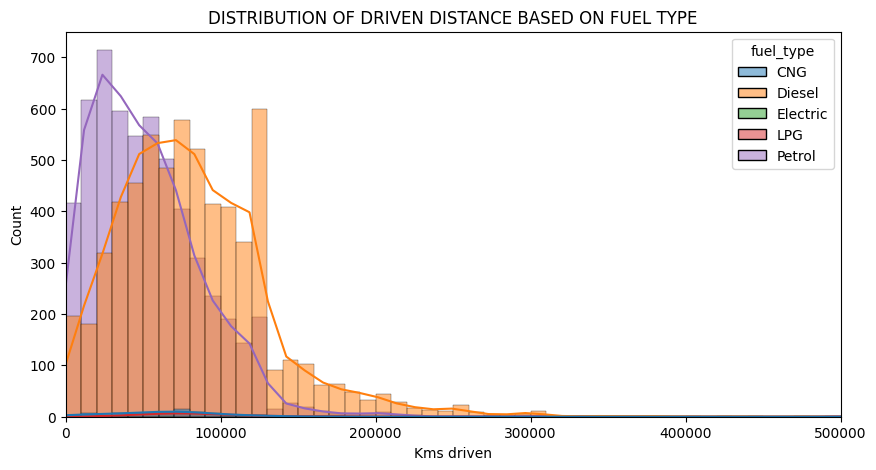

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(x='kms_driven', data=df, kde=True, hue='fuel_type', bins=50, binrange=(0, 500000))
plt.xlim(0, 500000)
plt.xlabel("Kms driven")
plt.ylabel("Count")
plt.title("DISTRIBUTION OF DRIVEN DISTANCE BASED ON FUEL TYPE")
plt.show()

Insights: Petrol cars are usually driven less than diesel cars

In [16]:
owner = df.owner.value_counts()
owner

First Owner             7812
Second Owner            3005
Third Owner              805
Fourth & Above Owner     231
Test Drive Car            22
Name: owner, dtype: int64

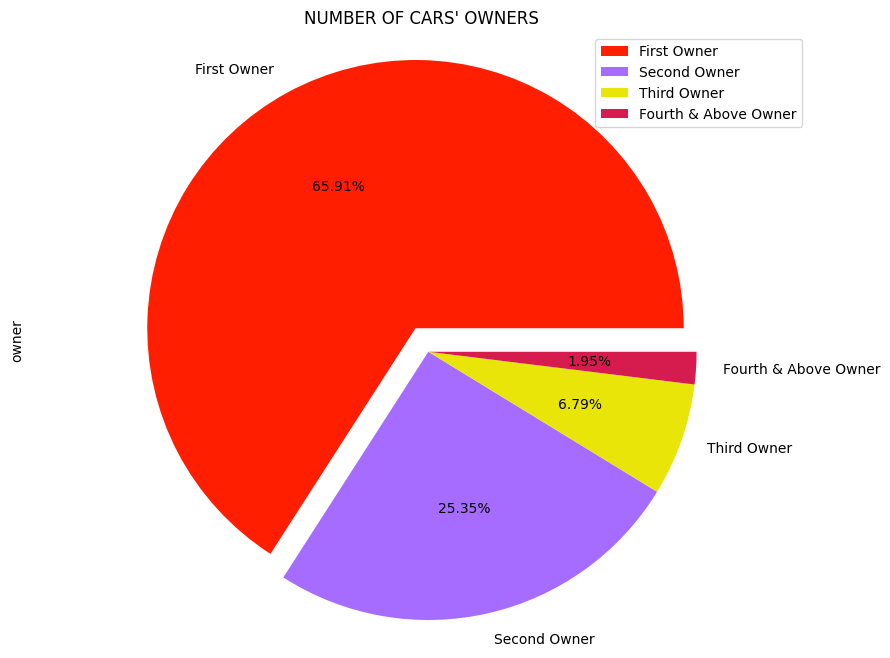

In [17]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

owner[:4].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=owner[:4].index, loc="best")
plt.title("NUMBER OF CARS' OWNERS")
plt.show()

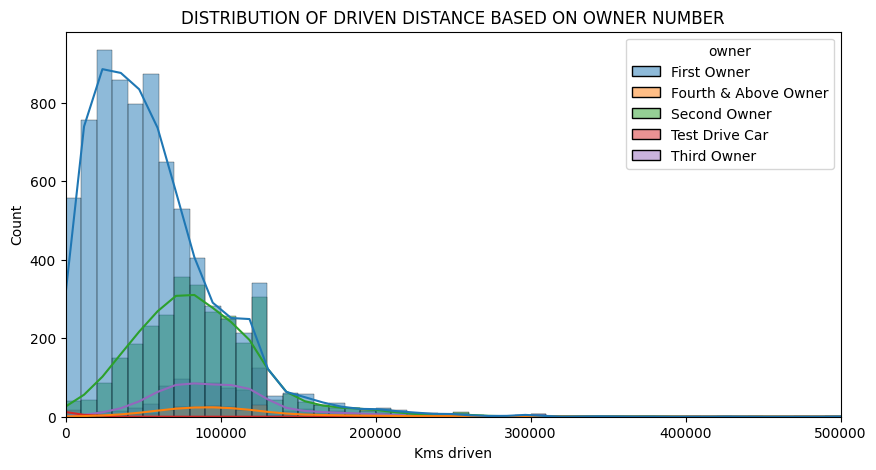

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(x='kms_driven', data=df, kde=True, hue='owner', bins=50, binrange=(0, 500000))
plt.xlim(0, 500000)
plt.xlabel("Kms driven")
plt.ylabel("Count")
plt.title("DISTRIBUTION OF DRIVEN DISTANCE BASED ON OWNER NUMBER")
plt.show()

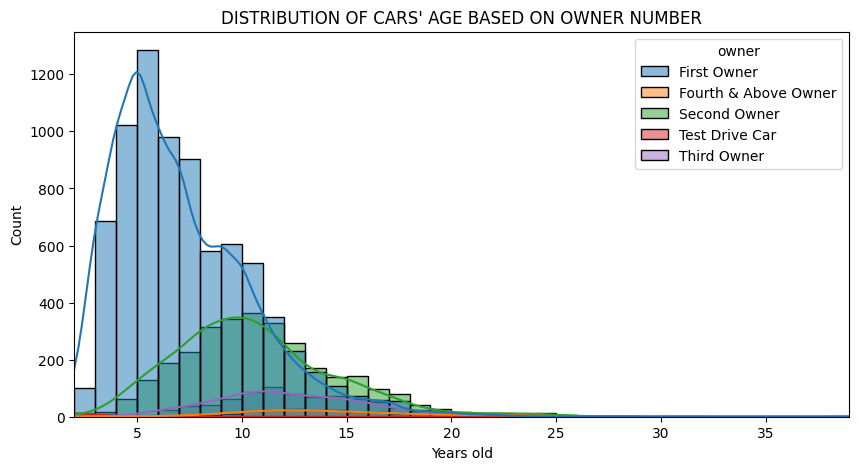

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(x='cars_years_old', data=df, kde=True, hue='owner', bins=(max(df.cars_years_old)-min(df.cars_years_old)))
plt.xlim(min(df.cars_years_old), max(df.cars_years_old))
plt.xlabel("Years old")
plt.ylabel("Count")
plt.title("DISTRIBUTION OF CARS' AGE BASED ON OWNER NUMBER")
plt.show()

Insights: From this graph and the graphs above we see that traveled distance and age are increased with number of cars' owners.

In [20]:
seller_type = df.seller_type.value_counts()
seller_type

Individual          9413
Dealer              2150
Trustmark Dealer     312
Name: seller_type, dtype: int64

In [21]:
transmission = df.transmission.value_counts()
transmission

Manual       10439
Automatic     1436
Name: transmission, dtype: int64

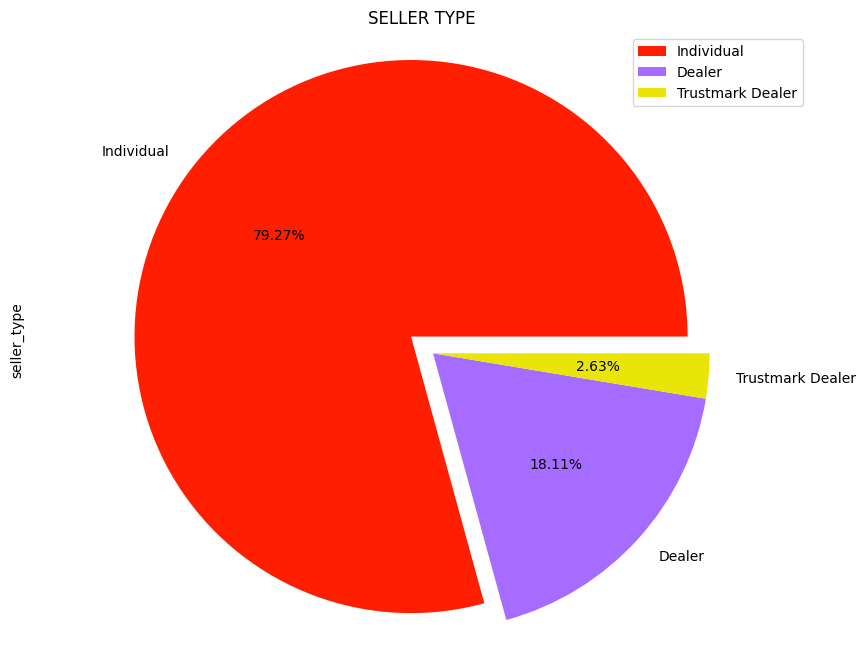

In [22]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

seller_type.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=seller_type.index, loc="best")
plt.title("SELLER TYPE")
plt.show()

Insights: Most car sellers are individual. Normal dealers are about 1/5 of overall cars number. Only a small number is trustmark dealer.

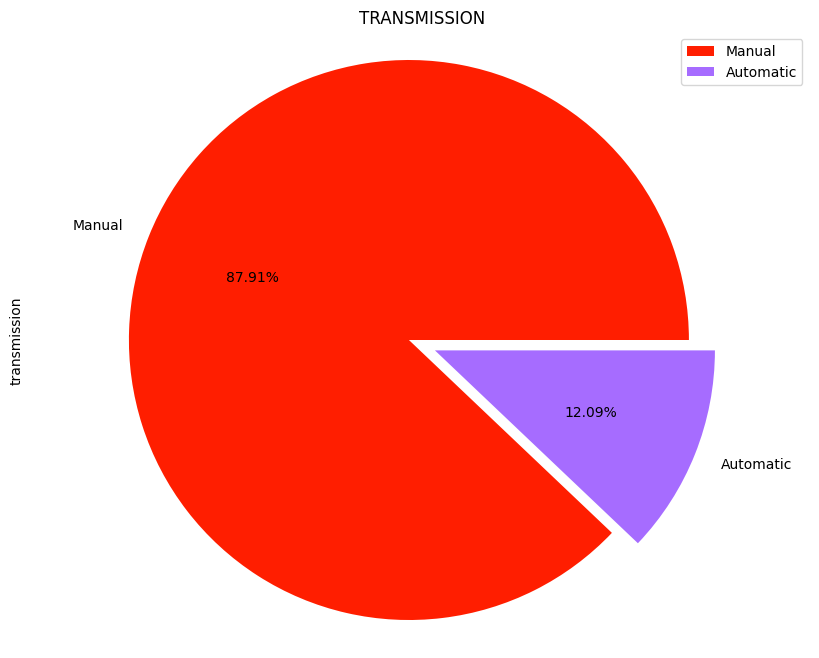

In [23]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

transmission.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=transmission.index, loc="best")
plt.title("TRANSMISSION")
plt.show()

[1495, 8738, 206]
[655, 675, 106]


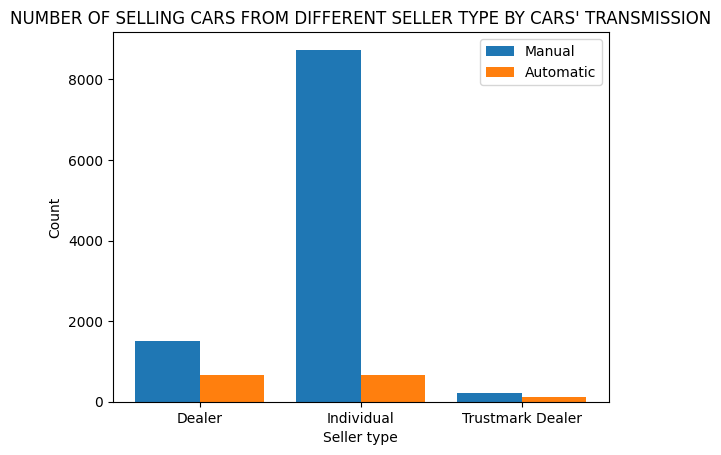

In [24]:
levels = df.seller_type.unique()
values_1 = []
values_2 = []
for level in levels:
    values_1.append(df['seller_type'].loc[df.transmission == 'Manual'].loc[df['seller_type'] == level].count())
    values_2.append(df['seller_type'].loc[df.transmission == 'Automatic'].loc[df['seller_type'] == level].count())
X_axis = np.arange(len(levels))

plt.bar(X_axis - 0.2, values_1, label='Manual', width=0.4)
plt.bar(X_axis + 0.2, values_2, label='Automatic', width=0.4)
print(values_1)
print(values_2)
plt.xticks(X_axis, levels)
plt.xlabel("Seller type")
plt.ylabel("Count")
plt.title("NUMBER OF SELLING CARS FROM DIFFERENT SELLER TYPE BY CARS' TRANSMISSION")
plt.legend()
plt.show()

Insights: Number of manual cars clearly overwhelm automatic ones. For both trustmark and normal dealer, the ratio is about 2/1. For individual sellers, most cars are manual.

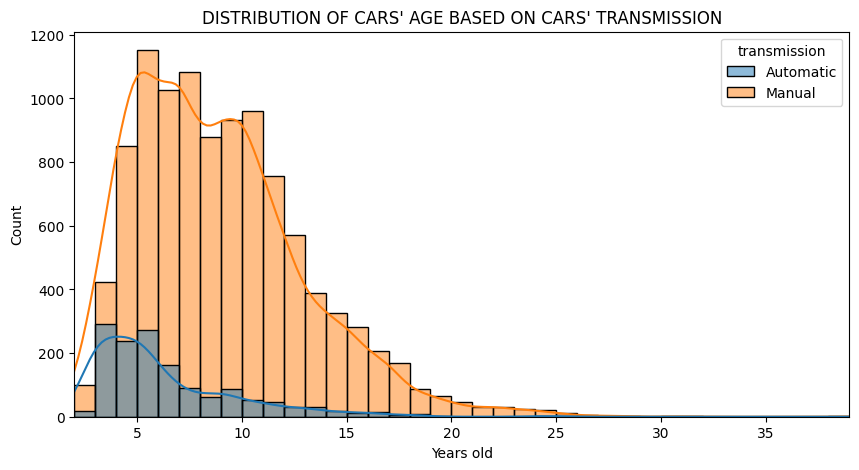

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(x='cars_years_old', data=df, kde=True, hue='transmission', bins=(max(df.cars_years_old)-min(df.cars_years_old)))
plt.xlim(min(df.cars_years_old), max(df.cars_years_old))
plt.xlabel("Years old")
plt.ylabel("Count")
plt.title("DISTRIBUTION OF CARS' AGE BASED ON CARS' TRANSMISSION")
plt.show()

insights: There is not a clear difference between 2, but there's a hint that automatic cars are slightly newer.

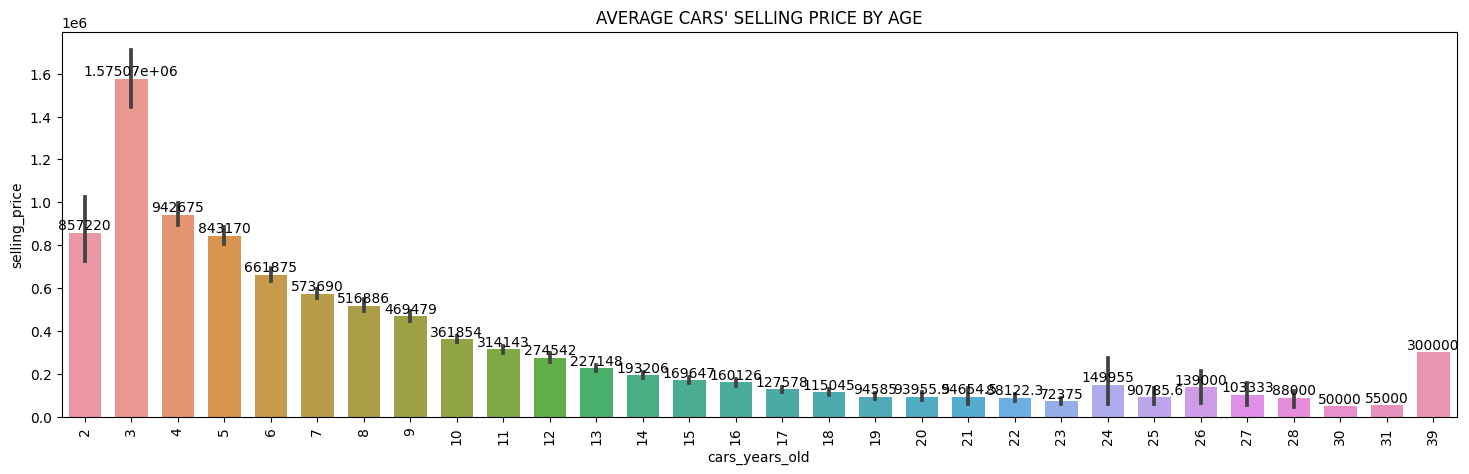

In [26]:
plt.figure(figsize=(18, 5))

ax = sns.barplot(x="cars_years_old", y="selling_price", data=df, width=0.7)
plt.xticks(rotation=90)
plt.title("AVERAGE CARS' SELLING PRICE BY AGE")

for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

Insights: Obviously average cars' price goes down with the increase of age. Also need to notice that 3-year-old cars seem to be expensive that 2-year-old ones.

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY DRIVEN DISTANCE')

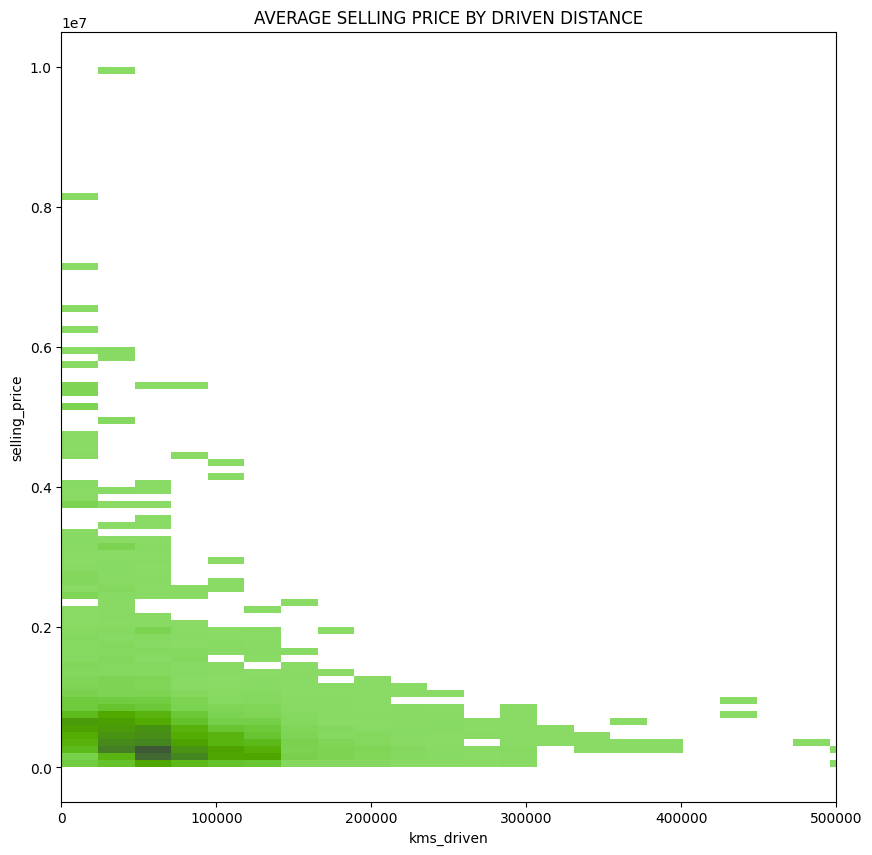

In [27]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="kms_driven", y="selling_price", data=df, bins=100, color="lawngreen")
plt.xlim(0, 500000)
plt.title("AVERAGE SELLING PRICE BY DRIVEN DISTANCE")


Insights: Here we can see that cars, which have already traveled a lot, have better price than less driven cars. Although price of cars, which traveled less, varies in a quite large range. Most of them are less than a milion.

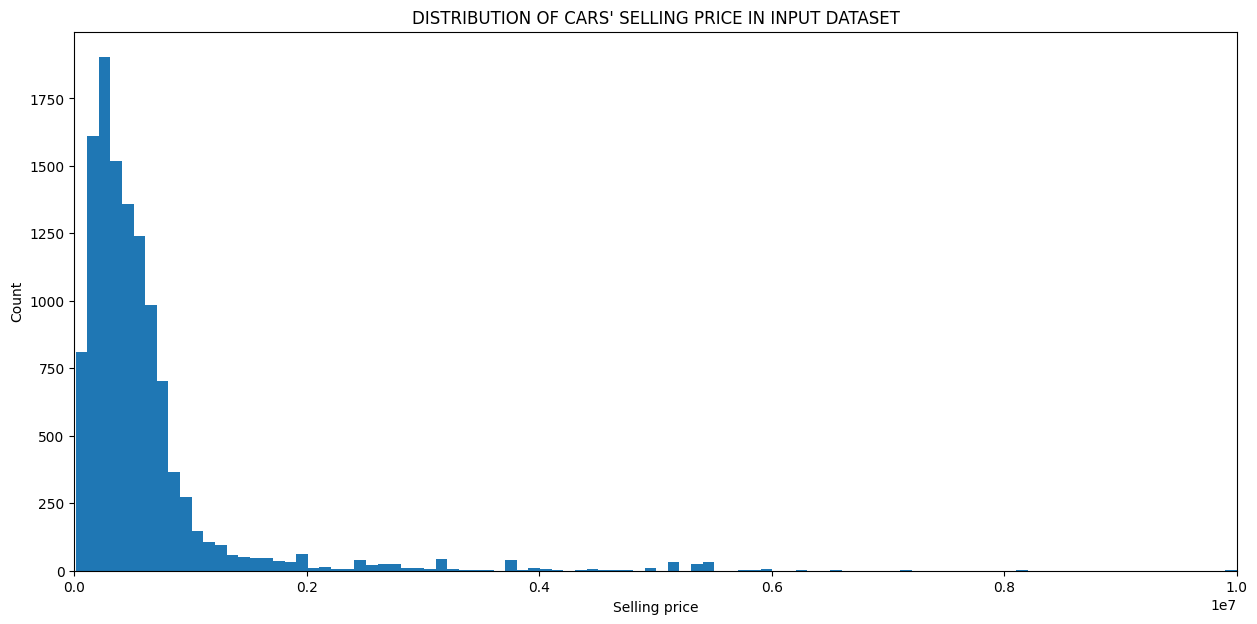

In [28]:
plt.figure(figsize=(15,7))
plt.hist(df.selling_price, bins = 100)
plt.title("DISTRIBUTION OF CARS' SELLING PRICE IN INPUT DATASET")
plt.xlabel("Selling price")
plt.ylabel("Count")
plt.xlim(0, max(df.selling_price))
plt.show()

Insights: Although cars' price varies in a large range, most of them are under 1 milion.

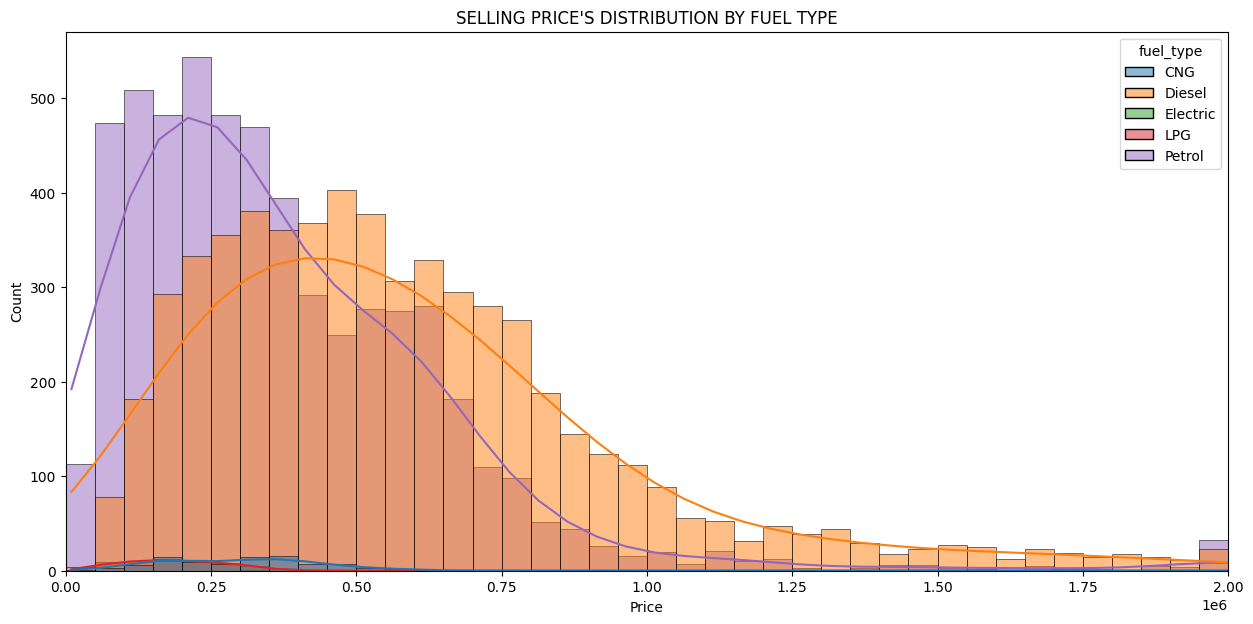

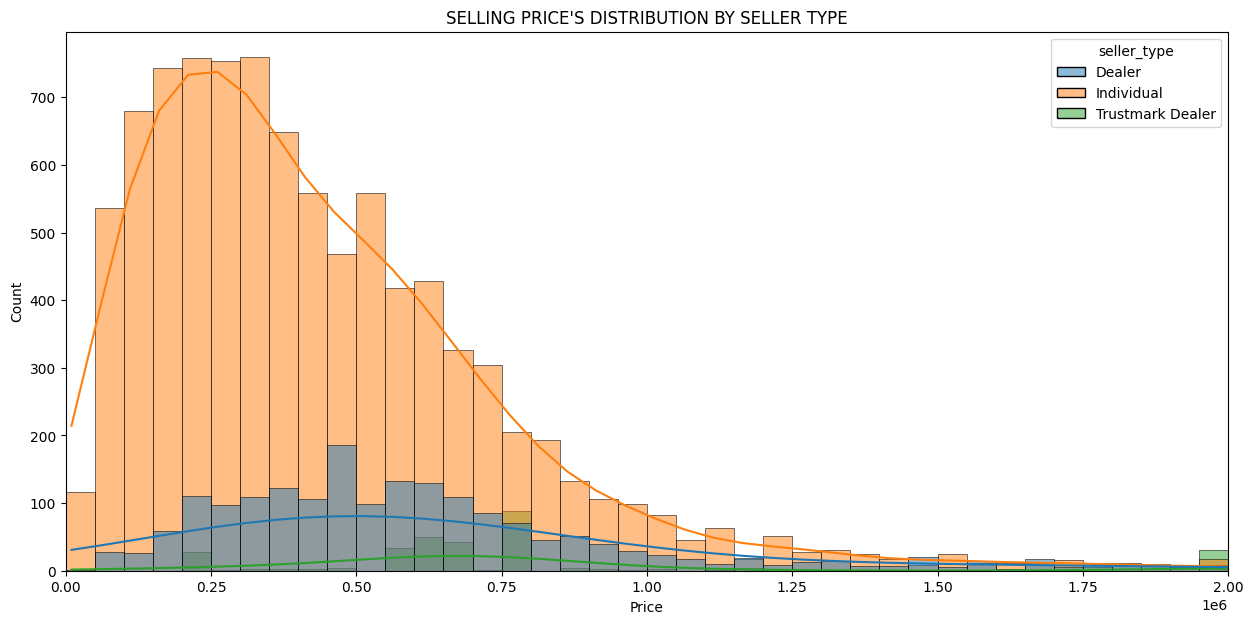

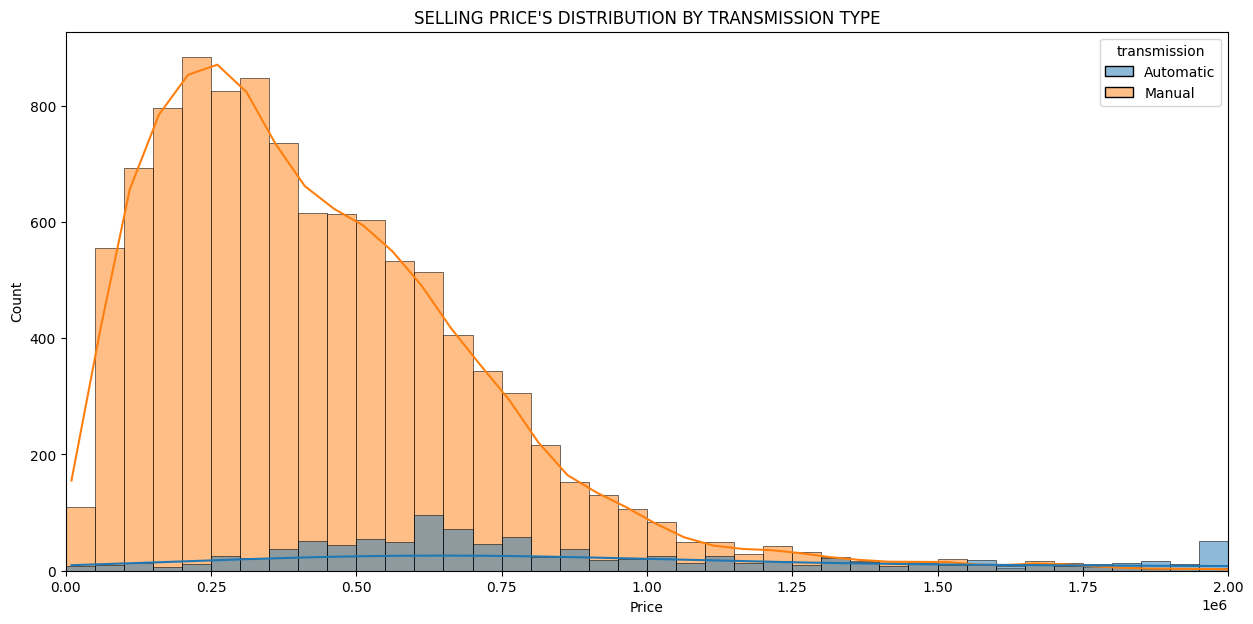

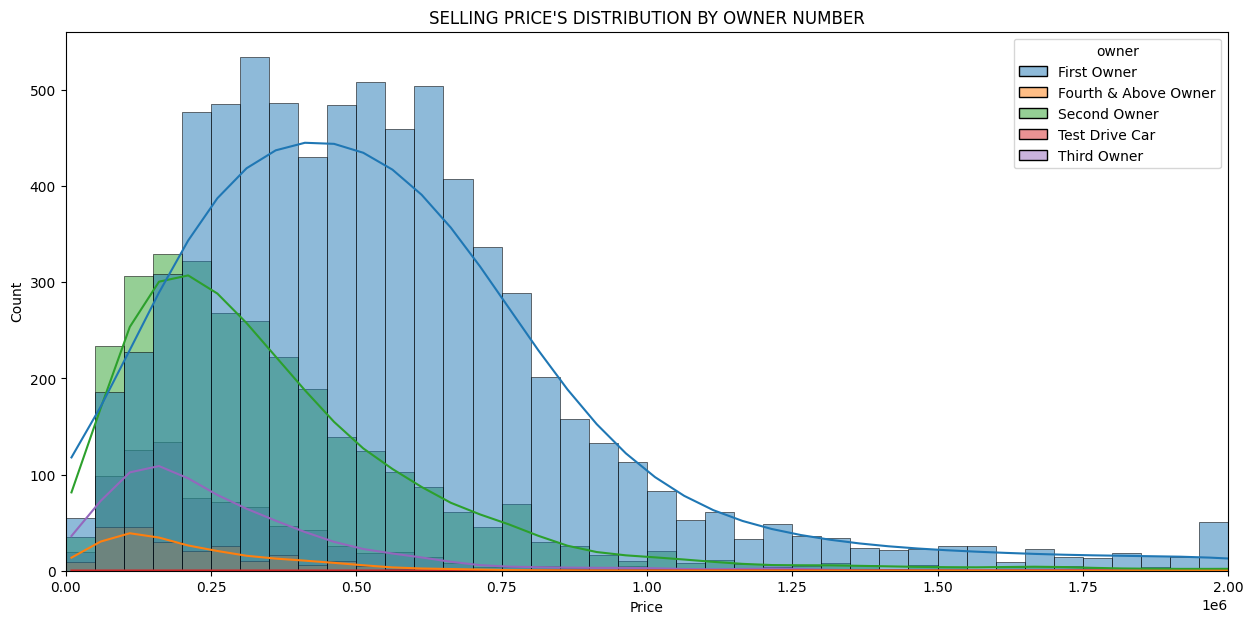

In [29]:
plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='fuel_type', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY FUEL TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='seller_type', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY SELLER TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='transmission', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY TRANSMISSION TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='owner', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY OWNER NUMBER")
plt.show()

Insights:
On above graphs we see that cars' price is varies by different fuel type, seller type, transmission, owner. For most of them (fuel type, seller type, owner), the differences in cars' price are not big, average price just slights shift for each type of fuel, seller or number of owners). However, transmission type seems to have more impact on the price. On the graph can clearly see that manual cars are cheaper that automatics.

Conclusion:
To create a prediction model for cars' selling price, need to create substitutes for categorical variables, cars' name can be removed from dataset, then all of remain variables should be included in calculation because of their correlation with selling price. Year of manufacture can be convert into cars' age for easier understanding. 